# Understanding the solar data

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import os
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap, cm
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/er113/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.columns

Index([u'Date', u'ACME', u'ADAX', u'ALTU', u'APAC', u'ARNE', u'BEAV', u'BESS',
       u'BIXB', u'BLAC', u'BOIS', u'BOWL', u'BREC', u'BRIS', u'BUFF', u'BURB',
       u'BURN', u'BUTL', u'BYAR', u'CAMA', u'CENT', u'CHAN', u'CHER', u'CHEY',
       u'CHIC', u'CLAY', u'CLOU', u'COOK', u'COPA', u'DURA', u'ELRE', u'ERIC',
       u'EUFA', u'FAIR', u'FORA', u'FREE', u'FTCB', u'GOOD', u'GUTH', u'HASK',
       u'HINT', u'HOBA', u'HOLL', u'HOOK', u'HUGO', u'IDAB', u'JAYX', u'KENT',
       u'KETC', u'LAHO', u'LANE', u'MADI', u'MANG', u'MARE', u'MAYR', u'MCAL',
       u'MEDF', u'MEDI', u'MIAM', u'MINC', u'MTHE', u'NEWK', u'NINN', u'NOWA',
       u'OILT', u'OKEM', u'OKMU', u'PAUL', u'PAWN', u'PERK', u'PRYO', u'PUTN',
       u'REDR', u'RETR', u'RING', u'SALL', u'SEIL', u'SHAW', u'SKIA', u'SLAP',
       u'SPEN', u'STIG', u'STIL', u'STUA', u'SULP', u'TAHL', u'TALI', u'TIPT',
       u'TISH', u'VINI', u'WASH', u'WATO', u'WAUR', u'WEAT', u'WEST', u'WILB',
       u'WIST', u'WOOD', u'WYNO'],
      dtype='obje

In [4]:
df_train['ACME'].describe()

count        5113.000000
mean     16877461.905730
std       7869605.526802
min         12000.000000
25%      11404200.000000
50%      16946400.000000
75%      23734800.000000
max      31347900.000000
Name: ACME, dtype: float64

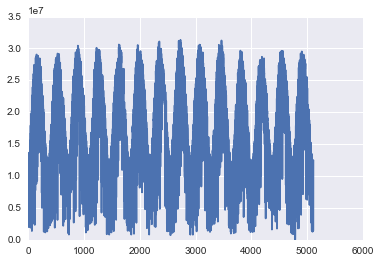

In [5]:
pl.plot(df_train['ACME'])

In [6]:
df_train['Date'].describe()

count        5113.000000
mean     20005665.131821
std         40312.858389
min      19940101.000000
25%      19970702.000000
50%      20001231.000000
75%      20040701.000000
max      20071231.000000
Name: Date, dtype: float64

In [7]:
mov_av_ACME=pd.rolling_mean(df_train['ACME'],288)

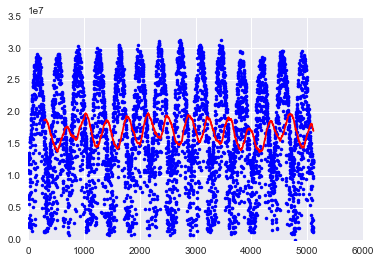

In [8]:
pl.plot(df_train['ACME'],".",color="b")
pl.plot(mov_av_ACME,color="r")

In [9]:
df_stations = pd.read_csv('station_info.csv')

In [10]:
df_stations.columns

Index([u'stid', u'nlat', u'elon', u'elev'], dtype='object')

In [11]:
len(df_stations['stid'])

98

In [26]:
max_solar=df_train.max().drop('Date')
min_solar=df_train.min().drop('Date')
average_solar=df_train.mean().drop('Date')

In [28]:
max_solar=max_solar.to_frame(name='Max_solar').reset_index()
min_solar=min_solar.to_frame(name='Min_solar').reset_index()
average_solar=average_solar.to_frame(name='Av_solar').reset_index()

In [29]:
df_stations=pd.concat([df_stations,max_solar['Max_solar']],axis=1)
df_stations=pd.concat([df_stations,min_solar['Min_solar']],axis=1)
df_stations=pd.concat([df_stations,average_solar['Av_solar']],axis=1)

In [15]:
df_stations

,stid,nlat,elon,elev,Max_solar,Min_solar,Av_solar
0,ACME,34.80833,-98.02325,397,31347900,12000,16877461.905730
1,ADAX,34.79851,-96.66909,295,31227000,510000,16237533.976922
2,ALTU,34.58722,-99.33808,416,31411500,900,17119188.785449
3,APAC,34.91418,-98.29216,440,31616100,3300,17010565.323685
4,ARNE,36.07204,-99.90308,719,32645700,477300,17560172.951301
5,BEAV,36.80253,-100.53012,758,32884800,300,17612143.106591
6,BESS,35.40185,-99.05847,511,31887900,510600,17304074.163896
7,BIXB,35.96305,-95.86621,184,31702200,74700,15969634.239781
8,BLAC,36.75443,-97.25452,304,30771900,36000,16061706.559750
9,BOIS,36.69256,-102.49713,1267,32922000,467100,18688943.328770


In [16]:
def load_data(filename):
    data=Dataset(filename)
    return data


In [17]:
predictors = ['apcp_sfc','dlwrf_sfc','dswrf_sfc','pres_msl','pwat_eatm',\
                  'spfh_2m','tcdc_eatm','tcolc_eatm','tmax_2m','tmin_2m',\
                  'tmp_2m','tmp_sfc','ulwrf_sfc','ulwrf_tatm','uswrf_sfc']
train_end = '_latlon_subset_19940101_20071231.nc'
path='train/'

In [18]:
apcp_sfc=load_data(os.path.join(path,predictors[0]+train_end))

In [19]:
apcp_sfc.variables

OrderedDict([(u'time', <type 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  long_name: Time
                  units: hours since 1800-01-01 00:00:00
                  axis: T
              unlimited dimensions: 
              current shape = (5113,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'intTime', <type 'netCDF4._netCDF4.Variable'>
              int32 intTime(time)
                  long_name: time as an integer (YYYYMMDDHH)
              unlimited dimensions: 
              current shape = (5113,)
              filling on, default _FillValue of -2147483647 used),
             (u'lat', <type 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  long_name: Latitude
                  standard_name: latitude
                  units: degrees_north
                  actual_range: [ 31.  39.]
                  axis: Y
              unlimited dimensions: 
              current shape = (9

In [20]:
max_solar

,index,Max_solar
0,ACME,31347900
1,ADAX,31227000
2,ALTU,31411500
3,APAC,31616100
4,ARNE,32645700
5,BEAV,32884800
6,BESS,31887900
7,BIXB,31702200
8,BLAC,30771900
9,BOIS,32922000


In [23]:
mean_ACME=df_train['ACME'].mean()

In [24]:
mean_ACME

16877461.90573049

In [27]:
max_solar

ACME    31347900
ADAX    31227000
ALTU    31411500
APAC    31616100
ARNE    32645700
BEAV    32884800
BESS    31887900
BIXB    31702200
BLAC    30771900
BOIS    32922000
BOWL    30781200
BREC    31686300
BRIS    31034400
BUFF    32508900
BURB    30988500
BURN    30654600
BUTL    32085600
BYAR    32630700
CAMA    32383500
CENT    31320000
CHAN    30746700
CHER    33131700
CHEY    31696200
CHIC    30572400
CLAY    30585000
CLOU    31603500
COOK    31453500
COPA    31713600
DURA    31234200
ELRE    31622100
          ...   
PERK    31170600
PRYO    31008300
PUTN    31658700
REDR    31220100
RETR    31352100
RING    31944600
SALL    31555200
SEIL    31505400
SHAW    30981900
SKIA    31302600
SLAP    32355600
SPEN    31812300
STIG    31633500
STIL    31572900
STUA    31695900
SULP    31565100
TAHL    31383600
TALI    31434000
TIPT    32078700
TISH    31626600
VINI    31214100
WASH    31917600
WATO    31414200
WAUR    31262400
WEAT    31746600
WEST    32030100
WILB    31902300
WIST    310878